In [1]:
import pandas as pd
df = pd.read_csv('data/compas-scores-raw.csv')

In [2]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Person_ID,60843.0,53683.206154,14363.648515,656.00,52039.00,57321.00,62748.0,68608.0
AssessmentID,60843.0,68061.029190,7320.208226,649.00,62582.00,68229.00,73870.0,79678.0
Case_ID,60843.0,60209.128149,9638.501654,350.00,56021.00,61261.00,66554.0,72045.0
ScaleSet_ID,60843.0,21.819536,0.932614,17.00,22.00,22.00,22.0,22.0
RecSupervisionLevel,60843.0,1.630048,0.944220,1.00,1.00,1.00,2.0,4.0
Scale_ID,60843.0,11.000000,4.966596,7.00,7.00,8.00,18.0,18.0
RawScore,60843.0,5.081457,10.080518,-4.79,-2.09,-0.71,14.0,51.0
DecileScore,60843.0,3.571701,2.617854,-1.00,1.00,3.00,5.0,10.0
IsCompleted,60843.0,1.000000,0.000000,1.00,1.00,1.00,1.0,1.0
IsDeleted,60843.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

# Check number of null for each column

In [5]:
df.isnull().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

## Calculate age from DOB and Screening Date

In [6]:
# Found an entry where DoB was 2018, this entry will be removed.
person_id_filter = df['Person_ID'] == 54272
result_df = df[person_id_filter]
print(result_df)
df = df[df['Person_ID'] != 54272]

       Person_ID  AssessmentID  Case_ID Agency_Text   LastName FirstName  \
12000      54272         61547    55871    PRETRIAL  Lightfoot     Corey   
12001      54272         61547    55871    PRETRIAL  Lightfoot     Corey   
12002      54272         61547    55871    PRETRIAL  Lightfoot     Corey   

      MiddleName Sex_Code_Text  Ethnic_Code_Text DateOfBirth  ...  \
12000        NaN          Male  African-American    11/04/18  ...   
12001        NaN          Male  African-American    11/04/18  ...   
12002        NaN          Male  African-American    11/04/18  ...   

       RecSupervisionLevel RecSupervisionLevelText Scale_ID  \
12000                    1                     Low        7   
12001                    1                     Low        8   
12002                    1                     Low       18   

                     DisplayText RawScore DecileScore ScoreText  \
12000           Risk of Violence    -3.53           1       Low   
12001         Risk of Recidivis

In [7]:
# DateOfBirth has values like 10/1/1977, 08/31/80, 08/14/90, 1/3/1986
# to standardise, we shall extract the last 2 characters and park them in a new column "BirthYear"
df['BirthYear'] = df['DateOfBirth'].str[-2:]

# Convert BirthYear to numeric
df['BirthYear'] = pd.to_numeric(df['BirthYear'], errors='coerce')

# Add '19' to the values in 'BirthYear'
df['BirthYear'] = df['BirthYear'].apply(lambda x: x + 1900)


# Display the updated DataFrame
print(df[['DateOfBirth', 'BirthYear']])

# To check, we should investigate the earliest and latest birthYear.
min_birth_year = df['BirthYear'].min()
max_birth_year = df['BirthYear'].max()

print("Lowest Birth Year:", min_birth_year)
print("Highest Birth Year:", max_birth_year)

      DateOfBirth  BirthYear
0        12/05/92       1992
1        12/05/92       1992
2        12/05/92       1992
3        09/16/84       1984
4        09/16/84       1984
...           ...        ...
60838    06/21/64       1964
60839    06/21/64       1964
60840    02/06/85       1985
60841    02/06/85       1985
60842    02/06/85       1985

[60840 rows x 2 columns]
Lowest Birth Year: 1919
Highest Birth Year: 1998


In [8]:
# Screening_Date has values like 3/31/14 0:00 and 10/3/2013 0:00
# to standardise, we shall extract the last 2 characters and park them in a new column "ScreeningYear"

# Convert 'Screening_Date' to datetime
df['Screening_Date'] = pd.to_datetime(df['Screening_Date'], errors='coerce')

# Extract the year and ensure it is in four-digit format
df['ScreeningYear'] = df['Screening_Date'].dt.year.apply(lambda x: x if x >= 1000 else x + 2000)

In [9]:
from datetime import datetime

# Calculate age and create a new column "Age"
df['Age'] = df['ScreeningYear'] - df['BirthYear']
df['Age']

0        21
1        21
2        21
3        29
4        29
         ..
60838    50
60839    50
60840    29
60841    29
60842    29
Name: Age, Length: 60840, dtype: int64

In [10]:
# Define age bins and labels
bins = [15, 24, 64, 100]
labels = ['1', '2', '3']

# Create the "AgeGroup" column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60840 entries, 0 to 60842
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Person_ID                60840 non-null  int64         
 1   AssessmentID             60840 non-null  int64         
 2   Case_ID                  60840 non-null  int64         
 3   Agency_Text              60840 non-null  object        
 4   LastName                 60840 non-null  object        
 5   FirstName                60840 non-null  object        
 6   MiddleName               15648 non-null  object        
 7   Sex_Code_Text            60840 non-null  object        
 8   Ethnic_Code_Text         60840 non-null  object        
 9   DateOfBirth              60840 non-null  object        
 10  ScaleSet_ID              60840 non-null  int64         
 11  ScaleSet                 60840 non-null  object        
 12  AssessmentReason         60840 n

# Dropped column that has no decile score

In [12]:
df_cleaned = df.dropna(subset=['ScoreText'])

In [13]:
df_cleaned.isnull().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45156
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                      0
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
BirthYear                      0
ScreeningYear                  0
Age       

In [14]:
data_types = df_cleaned.dtypes
print(data_types)

Person_ID                           int64
AssessmentID                        int64
Case_ID                             int64
Agency_Text                        object
LastName                           object
FirstName                          object
MiddleName                         object
Sex_Code_Text                      object
Ethnic_Code_Text                   object
DateOfBirth                        object
ScaleSet_ID                         int64
ScaleSet                           object
AssessmentReason                   object
Language                           object
LegalStatus                        object
CustodyStatus                      object
MaritalStatus                      object
Screening_Date             datetime64[ns]
RecSupervisionLevel                 int64
RecSupervisionLevelText            object
Scale_ID                            int64
DisplayText                        object
RawScore                          float64
DecileScore                       

In [17]:
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Person_ID: [50844 50848 50855 ... 68595 68598 68603]
Unique values in AssessmentID: [57167 57174 57181 ... 79660 79665 79669]
Unique values in Case_ID: [51950 51956 51963 ... 72035 72038 72042]
Unique values in Agency_Text: ['PRETRIAL' 'Probation' 'DRRD' 'Broward County']
Unique values in LastName: ['Fisher' 'KENDALL' 'DAYES' ... 'WEBLEY' 'Sime' 'PENTO']
Unique values in FirstName: ['Kevin' 'KEVIN' 'DANIEL' ... 'STERN' 'krishna' 'Viki']
Unique values in MiddleName: [nan 'George' 'Nicole' ... 'Wilmington' 'SHEREE' 'THEOPHILUS']
Unique values in Sex_Code_Text: ['Male' 'Female']
Unique values in Ethnic_Code_Text: ['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian'
 'Native American' 'Oriental' 'Arabic']
Unique values in DateOfBirth: ['12/05/92' '09/16/84' '08/25/94' ... '07/07/72' '06/26/94' '08/09/87']
Unique values in ScaleSet_ID: [22 17]
Unique values in ScaleSet: ['Risk and Prescreen' 'All Scales']
Unique values in AssessmentReason: ['Intake']
Unique values in 

## Combining African_Am and African_American

In [16]:
df_cleaned["Ethnic_Code_Text"].replace({"African-Am": "African-American"}, inplace=True)
print("For Ethnic_Code_Text variable")
print(df_cleaned["Ethnic_Code_Text"].unique())
print(df_cleaned["Ethnic_Code_Text"].value_counts())

For Ethnic_Code_Text variable
['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian'
 'Native American' 'Oriental' 'Arabic']
African-American    27050
Caucasian           21765
Hispanic             8733
Other                2590
Asian                 324
Native American       219
Arabic                 75
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


C:\Users\Keith\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## One Hot Encoding

In [18]:
df_OHE = df_cleaned
df_encoded = pd.get_dummies(df_OHE, columns=['Agency_Text','Sex_Code_Text','Ethnic_Code_Text','ScaleSet','Language','LegalStatus','CustodyStatus','MaritalStatus','DisplayText'])
print(df_cleaned.shape)
print(df_encoded.shape)
print(df_encoded)

(60795, 32)
(60795, 64)
       Person_ID  AssessmentID  Case_ID LastName FirstName MiddleName  \
0          50844         57167    51950   Fisher     Kevin        NaN   
1          50844         57167    51950   Fisher     Kevin        NaN   
2          50844         57167    51950   Fisher     Kevin        NaN   
3          50848         57174    51956  KENDALL     KEVIN        NaN   
4          50848         57174    51956  KENDALL     KEVIN        NaN   
...          ...           ...      ...      ...       ...        ...   
60838      65667         79665    72038     West     James        NaN   
60839      65667         79665    72038     West     James        NaN   
60840      68603         79669    72042     Ryan   Michael        NaN   
60841      68603         79669    72042     Ryan   Michael        NaN   
60842      68603         79669    72042     Ryan   Michael        NaN   

      DateOfBirth  ScaleSet_ID AssessmentReason Screening_Date  ...  \
0        12/05/92           

## Check for duplicates

In [19]:
duplicate_rows = df_encoded[df_encoded.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [Person_ID, AssessmentID, Case_ID, LastName, FirstName, MiddleName, DateOfBirth, ScaleSet_ID, AssessmentReason, Screening_Date, RecSupervisionLevel, RecSupervisionLevelText, Scale_ID, RawScore, DecileScore, ScoreText, AssessmentType, IsCompleted, IsDeleted, BirthYear, ScreeningYear, Age, AgeGroup, Agency_Text_Broward County, Agency_Text_DRRD, Agency_Text_PRETRIAL, Agency_Text_Probation, Sex_Code_Text_Female, Sex_Code_Text_Male, Ethnic_Code_Text_African-American, Ethnic_Code_Text_Arabic, Ethnic_Code_Text_Asian, Ethnic_Code_Text_Caucasian, Ethnic_Code_Text_Hispanic, Ethnic_Code_Text_Native American, Ethnic_Code_Text_Oriental, Ethnic_Code_Text_Other, ScaleSet_All Scales, ScaleSet_Risk and Prescreen, Language_English, Language_Spanish, LegalStatus_Conditional Release, LegalStatus_Deferred Sentencing, LegalStatus_Other, LegalStatus_Parole Violator, LegalStatus_Post Sentence, LegalStatus_Pretrial, LegalStatus_Probation Violator

## Drop unneccesary columns

In [22]:
columns_to_drop_decilescore = ['Person_ID','AssessmentID','Case_ID','LastName','FirstName','MiddleName','DateOfBirth','ScaleSet_ID','AssessmentReason','Screening_Date','RecSupervisionLevelText','Scale_ID','BirthYear','ScreeningYear','RecSupervisionLevel','ScoreText','AssessmentType','IsCompleted','IsDeleted']
columns_to_drop_scoretext = ['Person_ID','AssessmentID','Case_ID','LastName','FirstName','MiddleName','DateOfBirth','ScaleSet_ID','AssessmentReason','Screening_Date','RecSupervisionLevelText','Scale_ID','BirthYear','ScreeningYear','RecSupervisionLevel','DecileScore','AssessmentType','IsCompleted','IsDeleted']

df_dropped_decilescore = df_encoded.drop(columns=columns_to_drop_decilescore)
df_dropped_scoretext = df_encoded.drop(columns=columns_to_drop_scoretext)

In [23]:
df_dropped_decilescore.info()
df_dropped_scoretext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60795 entries, 0 to 60842
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   RawScore                               60795 non-null  float64 
 1   DecileScore                            60795 non-null  int64   
 2   Age                                    60795 non-null  int64   
 3   AgeGroup                               60795 non-null  category
 4   Agency_Text_Broward County             60795 non-null  uint8   
 5   Agency_Text_DRRD                       60795 non-null  uint8   
 6   Agency_Text_PRETRIAL                   60795 non-null  uint8   
 7   Agency_Text_Probation                  60795 non-null  uint8   
 8   Sex_Code_Text_Female                   60795 non-null  uint8   
 9   Sex_Code_Text_Male                     60795 non-null  uint8   
 10  Ethnic_Code_Text_African-American      60795 non-null  uin

## Training model to predict Decile Score

In [24]:
from sklearn.model_selection import train_test_split

target_column = 'DecileScore'

X = df_dropped_decilescore.loc[:, df_dropped_decilescore.columns != target_column]
y = df_dropped_decilescore[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36477 entries, 40651 to 56469
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   RawScore                               36477 non-null  float64 
 1   Age                                    36477 non-null  int64   
 2   AgeGroup                               36477 non-null  category
 3   Agency_Text_Broward County             36477 non-null  uint8   
 4   Agency_Text_DRRD                       36477 non-null  uint8   
 5   Agency_Text_PRETRIAL                   36477 non-null  uint8   
 6   Agency_Text_Probation                  36477 non-null  uint8   
 7   Sex_Code_Text_Female                   36477 non-null  uint8   
 8   Sex_Code_Text_Male                     36477 non-null  uint8   
 9   Ethnic_Code_Text_African-American      36477 non-null  uint8   
 10  Ethnic_Code_Text_Arabic                36477 non-null 

In [26]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn

In [27]:
clf_decilescore = SVC(kernel='linear')

clf_decilescore.fit(X_train,y_train)

SVC(kernel='linear')

In [28]:
y_train_pred = clf_decilescore.predict(X_train)

y_test_pred = clf_decilescore.predict(X_test)

train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


print("Train Set - Actual vs Predicted:")
print(train_comparison)

print("\nTest Set - Actual vs Predicted:")
print(test_comparison)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('Test Accuracy: {:.2f}%'.format(accuracy_test * 100))

Train Set - Actual vs Predicted:
       Actual  Predicted
40651       5          4
53253       4          3
56516       2          2
55263       2          3
13564       4          4
...       ...        ...
54388       2          2
38200       1          1
860         4          3
15814       1          1
56469       2          2

[36477 rows x 2 columns]

Test Set - Actual vs Predicted:
       Actual  Predicted
37258       1          1
51138       2          2
8479        1          1
1334        3          3
47868       4          4
...       ...        ...
13369       2          2
43238       5          5
27584       1          1
56390       2          2
43321       1          1

[24318 rows x 2 columns]

Train Accuracy: 67.69%
Test Accuracy: 66.84%


In [29]:
coefficients = clf_decilescore.coef_

print("Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[0, i]}")

Coefficients:
RawScore: -3.1383012085798327
Age: 0.024750490658334456
AgeGroup: -0.2456331071934983
Agency_Text_Broward County: 0.05848294138042931
Agency_Text_DRRD: -0.07613964577852972
Agency_Text_PRETRIAL: -0.021308881796358037
Agency_Text_Probation: 0.03896558619442203
Sex_Code_Text_Female: -0.11421055210371378
Sex_Code_Text_Male: 0.11421055210394115
Ethnic_Code_Text_African-American: -0.06617090856775576
Ethnic_Code_Text_Arabic: 0.02034749875683639
Ethnic_Code_Text_Asian: 0.12751996469616245
Ethnic_Code_Text_Caucasian: -0.04382385669589439
Ethnic_Code_Text_Hispanic: 0.040097154192267226
Ethnic_Code_Text_Native American: -0.11097944642603252
Ethnic_Code_Text_Oriental: -0.08121021071859302
Ethnic_Code_Text_Other: 0.11421980476293925
ScaleSet_All Scales: 0.1656451317117984
ScaleSet_Risk and Prescreen: -0.16564513171169892
Language_English: 0.05339188391735661
Language_Spanish: -0.053391883917143446
LegalStatus_Conditional Release: -0.01904774706430601
LegalStatus_Deferred Sentencing:

## Training model to predict Score Text

In [31]:
from sklearn.model_selection import train_test_split

target_column = 'ScoreText'

X = df_dropped_scoretext.loc[:, df_dropped_scoretext.columns != target_column]
y = df_dropped_scoretext[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36477 entries, 40651 to 56469
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   RawScore                               36477 non-null  float64 
 1   Age                                    36477 non-null  int64   
 2   AgeGroup                               36477 non-null  category
 3   Agency_Text_Broward County             36477 non-null  uint8   
 4   Agency_Text_DRRD                       36477 non-null  uint8   
 5   Agency_Text_PRETRIAL                   36477 non-null  uint8   
 6   Agency_Text_Probation                  36477 non-null  uint8   
 7   Sex_Code_Text_Female                   36477 non-null  uint8   
 8   Sex_Code_Text_Male                     36477 non-null  uint8   
 9   Ethnic_Code_Text_African-American      36477 non-null  uint8   
 10  Ethnic_Code_Text_Arabic                36477 non-null 

In [33]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn

In [34]:
clf_scoretext = SVC(kernel='linear')

clf_scoretext.fit(X_train,y_train)

SVC(kernel='linear')

In [35]:
y_train_pred = clf_scoretext.predict(X_train)

y_test_pred = clf_scoretext.predict(X_test)

train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


print("Train Set - Actual vs Predicted:")
print(train_comparison)

print("\nTest Set - Actual vs Predicted:")
print(test_comparison)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('Test Accuracy: {:.2f}%'.format(accuracy_test * 100))

Train Set - Actual vs Predicted:
       Actual Predicted
40651  Medium    Medium
53253     Low       Low
56516     Low       Low
55263     Low       Low
13564     Low       Low
...       ...       ...
54388     Low       Low
38200     Low       Low
860       Low       Low
15814     Low       Low
56469     Low       Low

[36477 rows x 2 columns]

Test Set - Actual vs Predicted:
       Actual Predicted
37258     Low       Low
51138     Low       Low
8479      Low       Low
1334      Low       Low
47868     Low       Low
...       ...       ...
13369     Low       Low
43238  Medium    Medium
27584     Low       Low
56390     Low       Low
43321     Low       Low

[24318 rows x 2 columns]

Train Accuracy: 96.15%
Test Accuracy: 95.83%


In [36]:
coefficients = clf_scoretext.coef_

print("Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[0, i]}")

Coefficients:
RawScore: 2.0531387663600356
Age: -0.003954893716581864
AgeGroup: -0.023187094548802634
Agency_Text_Broward County: -0.19541076714397976
Agency_Text_DRRD: 0.03001661303313341
Agency_Text_PRETRIAL: 0.09576285802870643
Agency_Text_Probation: 0.06963129608206486
Sex_Code_Text_Female: 0.12225608298712132
Sex_Code_Text_Male: -0.12225608298717816
Ethnic_Code_Text_African-American: 0.12152453957037324
Ethnic_Code_Text_Arabic: -0.11554535302182593
Ethnic_Code_Text_Asian: -0.030893298055095553
Ethnic_Code_Text_Caucasian: 0.023237595946113743
Ethnic_Code_Text_Hispanic: 0.01651069515440895
Ethnic_Code_Text_Native American: 0.13175089334753132
Ethnic_Code_Text_Oriental: 0.0
Ethnic_Code_Text_Other: -0.14658507294141643
ScaleSet_All Scales: -0.008753118261822124
ScaleSet_Risk and Prescreen: 0.008753118261779491
Language_English: 0.05876255924840734
Language_Spanish: -0.05876255924842216
LegalStatus_Conditional Release: -0.1667660468513894
LegalStatus_Deferred Sentencing: 0.0
LegalStatu

## Check the correlation of raw score and decile score

In [37]:
#df_cleaned
condition_1 = df_cleaned['DisplayText'].isin(['Risk of Violence'])
condition_2 = df_cleaned['DisplayText'].isin(['Risk of Recidivism'])
condition_3 = df_cleaned['DisplayText'].isin(['Risk of Failure to Appear'])

df_1_violence = df_cleaned[condition_1].copy()
df_2_rec = df_cleaned[condition_2].copy()
df_3_failure = df_cleaned[condition_3].copy()

print("Dataframe 1:")
print(df_1_violence[['DisplayText','RawScore','DecileScore']])

print("Dataframe 2:")
print(df_2_rec[['DisplayText','RawScore','DecileScore']])

print("Dataframe 3:")
print(df_3_failure[['DisplayText','RawScore','DecileScore']])

Dataframe 1:
            DisplayText  RawScore  DecileScore
0      Risk of Violence     -2.08            4
3      Risk of Violence     -2.84            2
6      Risk of Violence     -1.20            8
9      Risk of Violence     -1.29            7
12     Risk of Violence     -2.90            2
...                 ...       ...          ...
60828  Risk of Violence     -1.61            6
60831  Risk of Violence     -2.50            3
60834  Risk of Violence     -3.12            1
60837  Risk of Violence     -2.03            4
60840  Risk of Violence     -2.75            2

[20271 rows x 3 columns]
Dataframe 2:
              DisplayText  RawScore  DecileScore
1      Risk of Recidivism     -1.06            2
4      Risk of Recidivism     -1.50            1
7      Risk of Recidivism      0.18            8
10     Risk of Recidivism     -0.53            6
13     Risk of Recidivism     -1.55            2
...                   ...       ...          ...
60829  Risk of Recidivism     -0.42      

In [38]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


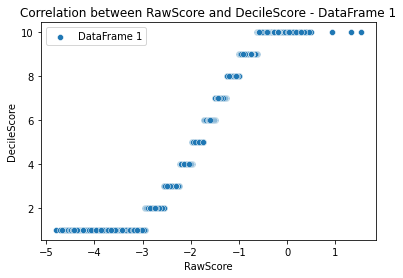

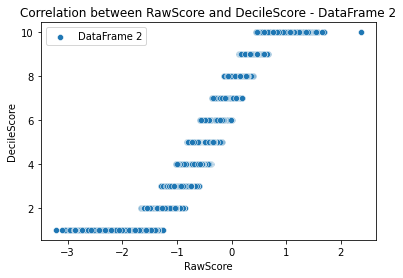

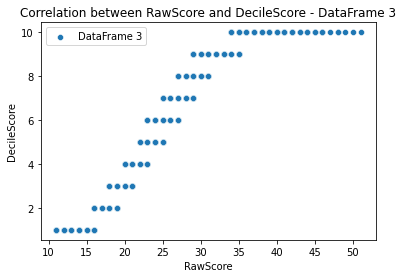

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation for DataFrame 1
sns.scatterplot(data=df_1_violence, x='RawScore', y='DecileScore', label='DataFrame 1')
plt.title('Correlation between RawScore and DecileScore - DataFrame 1')
plt.show()

# Plot correlation for DataFrame 2
sns.scatterplot(data=df_2_rec, x='RawScore', y='DecileScore', label='DataFrame 2')
plt.title('Correlation between RawScore and DecileScore - DataFrame 2')
plt.show()

# Plot correlation for DataFrame 3
sns.scatterplot(data=df_3_failure, x='RawScore', y='DecileScore', label='DataFrame 3')
plt.title('Correlation between RawScore and DecileScore - DataFrame 3')
plt.show()

In [44]:
columns_to_drop = ['Person_ID','AssessmentID','Case_ID','LastName','FirstName','MiddleName','DateOfBirth','ScaleSet_ID','AssessmentReason','Screening_Date','RecSupervisionLevelText','Scale_ID','BirthYear','ScreeningYear','RecSupervisionLevel','RawScore','DecileScore','DisplayText','AssessmentType','IsCompleted','IsDeleted','Age']

df_violence = df_1_violence.drop(columns = columns_to_drop)
df_rec = df_2_rec.drop(columns = columns_to_drop)
df_failure = df_3_failure.drop(columns = columns_to_drop)

df_violence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20271 entries, 0 to 60840
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Agency_Text       20271 non-null  object  
 1   Sex_Code_Text     20271 non-null  object  
 2   Ethnic_Code_Text  20271 non-null  object  
 3   ScaleSet          20271 non-null  object  
 4   Language          20271 non-null  object  
 5   LegalStatus       20271 non-null  object  
 6   CustodyStatus     20271 non-null  object  
 7   MaritalStatus     20271 non-null  object  
 8   ScoreText         20271 non-null  object  
 9   AgeGroup          20271 non-null  category
dtypes: category(1), object(9)
memory usage: 1.6+ MB


In [45]:
df_violence_enc = pd.get_dummies(df_violence, columns=['Agency_Text','Sex_Code_Text','Ethnic_Code_Text','ScaleSet','Language','LegalStatus','CustodyStatus','MaritalStatus'])
df_rec_enc = pd.get_dummies(df_rec, columns=['Agency_Text','Sex_Code_Text','Ethnic_Code_Text','ScaleSet','Language','LegalStatus','CustodyStatus','MaritalStatus'])
df_failure_enc = pd.get_dummies(df_failure, columns=['Agency_Text','Sex_Code_Text','Ethnic_Code_Text','ScaleSet','Language','LegalStatus','CustodyStatus','MaritalStatus'])

print(df_violence_enc)

      ScoreText AgeGroup  Agency_Text_Broward County  Agency_Text_DRRD  \
0           Low        1                           0                 0   
3           Low        2                           0                 0   
6          High        1                           0                 0   
9        Medium        1                           0                 0   
12          Low        2                           0                 0   
...         ...      ...                         ...               ...   
60828    Medium        2                           0                 0   
60831       Low        2                           0                 0   
60834       Low        2                           0                 0   
60837       Low        2                           0                 0   
60840       Low        2                           0                 0   

       Agency_Text_PRETRIAL  Agency_Text_Probation  Sex_Code_Text_Female  \
0                         1        

### Model for risk of violence

In [46]:
from sklearn.model_selection import train_test_split

target_column = 'ScoreText'

X = df_violence_enc.loc[:, df_violence_enc.columns != target_column]
y = df_violence_enc[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12162 entries, 17484 to 47415
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   AgeGroup                           12162 non-null  category
 1   Agency_Text_Broward County         12162 non-null  uint8   
 2   Agency_Text_DRRD                   12162 non-null  uint8   
 3   Agency_Text_PRETRIAL               12162 non-null  uint8   
 4   Agency_Text_Probation              12162 non-null  uint8   
 5   Sex_Code_Text_Female               12162 non-null  uint8   
 6   Sex_Code_Text_Male                 12162 non-null  uint8   
 7   Ethnic_Code_Text_African-American  12162 non-null  uint8   
 8   Ethnic_Code_Text_Arabic            12162 non-null  uint8   
 9   Ethnic_Code_Text_Asian             12162 non-null  uint8   
 10  Ethnic_Code_Text_Caucasian         12162 non-null  uint8   
 11  Ethnic_Code_Text_Hispanic          12

In [48]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn

In [49]:
clf_violence = SVC(kernel='linear')

clf_violence.fit(X_train,y_train)

SVC(kernel='linear')

In [51]:
y_train_pred = clf_violence.predict(X_train)

y_test_pred = clf_violence.predict(X_test)

train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


print("Train Set - Actual vs Predicted:")
print(train_comparison)

print("\nTest Set - Actual vs Predicted:")
print(test_comparison)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('Test Accuracy: {:.2f}%'.format(accuracy_test * 100))

Train Set - Actual vs Predicted:
       Actual Predicted
17484  Medium       Low
30381    High    Medium
14166    High    Medium
15153     Low       Low
6648     High       Low
...       ...       ...
33882  Medium    Medium
35922     Low       Low
16188     Low       Low
2580      Low       Low
47415     Low       Low

[12162 rows x 2 columns]

Test Set - Actual vs Predicted:
       Actual Predicted
50697     Low       Low
35886  Medium    Medium
54774     Low       Low
15075     Low       Low
29826     Low       Low
...       ...       ...
8298      Low       Low
29958    High    Medium
19038     Low       Low
19515     Low       Low
46047     Low       Low

[8109 rows x 2 columns]

Train Accuracy: 76.84%
Test Accuracy: 76.61%


In [53]:
coefficients = clf_violence.coef_

print("Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[0, i]}")

Coefficients:
AgeGroup: -1.802041799425524
Agency_Text_Broward County: 0.0
Agency_Text_DRRD: 0.235565926949576
Agency_Text_PRETRIAL: 0.23404993815836406
Agency_Text_Probation: -0.4696158651075848
Sex_Code_Text_Female: -0.4504159420675222
Sex_Code_Text_Male: 0.45041594206782065
Ethnic_Code_Text_African-American: 0.8871084587883615
Ethnic_Code_Text_Arabic: -0.9151377898334023
Ethnic_Code_Text_Asian: -0.9147720817962863
Ethnic_Code_Text_Caucasian: -0.01445725971450429
Ethnic_Code_Text_Hispanic: -0.014471317620177615
Ethnic_Code_Text_Native American: 0.8867148161796905
Ethnic_Code_Text_Oriental: 1.0
Ethnic_Code_Text_Other: -0.9149848260035611
ScaleSet_All Scales: 0.5495027485589077
ScaleSet_Risk and Prescreen: -0.5495027485587798
Language_English: 2.2737367544323206e-13
Language_Spanish: 0.0
LegalStatus_Conditional Release: -0.08266616637562496
LegalStatus_Deferred Sentencing: 0.0
LegalStatus_Other: -0.5878853486831694
LegalStatus_Parole Violator: 0.0
LegalStatus_Post Sentence: 0.115803004

### Model for Risk of Rec

## Finding 2 similar entries

In [29]:
#df_cleaned
df_cleaned.info()

selected_columns = ['Agency_Text','Sex_Code_Text','Ethnic_Code_Text','ScaleSet','Language','LegalStatus','CustodyStatus','MaritalStatus','RecSupervisionLevel']